In [41]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [42]:
#Create empty lists to store the data we are about to collect from the website
#We would like to collect the names of the cars, the mileage, the price, the rating, the number of reviews the car received

# Initialize all arrays
car_name = []
car_mileage = []
car_price = []
car_location = []
car_year = []
car_ratings = []
car_reviews = []
car_vin = []

In [43]:
# Helper function to safely extract text
def get_text_or_na(element):
    if element:
        return element.get_text().strip()
    return 'n/a'

# Define the locations to search
locations = [
    {
        "name": "Boston, MA",
        "url_template": "https://www.truecar.com/used-cars-for-sale/listings/location-boston-ma/?mmt[]=toyota_tacoma&mmt[]=toyota_4runner&page={}"
    },
    {
        "name": "Ocean Springs, MS",
        "url_template": "https://www.truecar.com/used-cars-for-sale/listings/toyota/4runner/location-ocean-springs-ms/?page={}"
    }
]

# Process each location
for location in locations:
    location_name = location["name"]
    url_template = location["url_template"]
    
    # Process pages for this location
    for page_num in range(1, 11):
        website_url = url_template.format(page_num)
        print(f"Processing {location_name} page {page_num}: {website_url}")
        
        try:
            # Make request to the website
            web_request = requests.get(website_url, headers={
                'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36'
            })
            
            # Create an object to store the html elements of the request
            soup = BeautifulSoup(web_request.content, 'html.parser')
            
            # Find all car listings
            results_list = soup.find_all('div', {'class': 'mt-1 flex w-full items-start p-2 text-left flex-grow'})
            print(f"Found {len(results_list)} listings on page {page_num}")
            
            # Process each listing
            for result in results_list:
                # Extract name
                try:
                    name_element = result.find('h2', {'data-test': 'vehicleCardInfo'})
                    if name_element:
                        full_name = name_element.get_text().strip()
                        car_name.append(full_name)
                        
                        # Extract year from name
                        parts = full_name.split()
                        if len(parts) > 2 and parts[0] == "Used":
                            car_year.append(parts[1])
                        else:
                            car_year.append('n/a')
                    else:
                        car_name.append('n/a')
                        car_year.append('n/a')
                except:
                    car_name.append('n/a')
                    car_year.append('n/a')
                
                # Extract mileage
                try:
                    mileage_element = result.find('div', {'data-test': 'vehicleMileage'})
                    car_mileage.append(mileage_element.get_text().strip() if mileage_element else 'n/a')
                except:
                    car_mileage.append('n/a')
                
                # Extract price
                try:
                    price_element = result.find('span', {'data-test': 'vehicleCardPricingPrice'})
                    car_price.append(price_element.get_text().strip() if price_element else 'n/a')
                except:
                    car_price.append('n/a')
                
                # Set location based on current location being processed
                car_location.append(location_name)
                
                # Set default values for other fields
                car_ratings.append('n/a')
                car_reviews.append('n/a')
                car_vin.append('n/a')
                
                # Try to extract specific data from detailed information sections
                detail_sections = result.find_all('div', {'class': 'flex items-center'})
                for section in detail_sections:
                    text = section.get_text().strip().lower()
                    if 'vin' in text and ':' in text:
                        car_vin[-1] = text.split(':', 1)[1].strip()
                    elif 'rating' in text and ':' in text:
                        car_ratings[-1] = text.split(':', 1)[1].strip()
                    elif 'review' in text and ':' in text:
                        car_reviews[-1] = text.split(':', 1)[1].strip()
                        
        except Exception as e:
            print(f"Error processing {location_name} page {page_num}: {str(e)}")

# Check lengths of all arrays
print(f"car_name length: {len(car_name)}")
print(f"car_mileage length: {len(car_mileage)}")
print(f"car_price length: {len(car_price)}")
print(f"car_location length: {len(car_location)}")
print(f"car_year length: {len(car_year)}")
print(f"car_ratings length: {len(car_ratings)}")
print(f"car_reviews length: {len(car_reviews)}")
print(f"car_vin length: {len(car_vin)}")

# Find the minimum length of all arrays
min_length = min(len(car_name), len(car_mileage), len(car_price), len(car_location),
                len(car_year), len(car_ratings), len(car_reviews), len(car_vin))

# Trim all arrays to the same length
car_name = car_name[:min_length]
car_mileage = car_mileage[:min_length]
car_price = car_price[:min_length]
car_location = car_location[:min_length]
car_year = car_year[:min_length]
car_ratings = car_ratings[:min_length]
car_reviews = car_reviews[:min_length]
car_vin = car_vin[:min_length]

# Create the DataFrame
car_info = pd.DataFrame({
    'Name': car_name,
    'Mileage': car_mileage,
    'Price': car_price,
    'Location': car_location,
    'Year': car_year,
    'Rating': car_ratings,
    'Reviews': car_reviews,
    'VIN': car_vin
})

# Save to CSV
car_info.to_csv('toyota_listings_both_locations.csv', index=False)
print(f"DataFrame created with {len(car_info)} rows and saved to CSV")

Processing Boston, MA page 1: https://www.truecar.com/used-cars-for-sale/listings/location-boston-ma/?mmt[]=toyota_tacoma&mmt[]=toyota_4runner&page=1
Found 33 listings on page 1
Processing Boston, MA page 2: https://www.truecar.com/used-cars-for-sale/listings/location-boston-ma/?mmt[]=toyota_tacoma&mmt[]=toyota_4runner&page=2
Found 33 listings on page 2
Processing Boston, MA page 3: https://www.truecar.com/used-cars-for-sale/listings/location-boston-ma/?mmt[]=toyota_tacoma&mmt[]=toyota_4runner&page=3
Found 33 listings on page 3
Processing Boston, MA page 4: https://www.truecar.com/used-cars-for-sale/listings/location-boston-ma/?mmt[]=toyota_tacoma&mmt[]=toyota_4runner&page=4
Found 30 listings on page 4
Processing Boston, MA page 5: https://www.truecar.com/used-cars-for-sale/listings/location-boston-ma/?mmt[]=toyota_tacoma&mmt[]=toyota_4runner&page=5
Found 30 listings on page 5
Processing Boston, MA page 6: https://www.truecar.com/used-cars-for-sale/listings/location-boston-ma/?mmt[]=to

In [48]:
# Create a DataFrame

car_info = pd.DataFrame({'Name': car_name, 'Mileage': car_mileage, 'Price': car_price, 'Location': car_location, 'Year': car_year})

# Create the DataFrame with all data
import pandas as pd
car_info = pd.DataFrame({
    'Name': car_name,
    'Mileage': car_mileage,
    'Price': car_price,
    'Location': car_location,
    'Year': car_year,
})

In [49]:
#Let's clean the data frame

#The first thing we should do is to edit the Reviews column

car_info['Mileage'] = car_info['Mileage'].apply(lambda x:x.replace('miles', '')) #remove 'miles' from the mileage column
car_info['Mileage'] = car_info['Mileage'].apply(lambda x:x.replace('k', '000')) #remove 'k' from the mileage column
car_info['Price'] = car_info['Price'].apply(lambda x:x.replace('$', '')) # remove the $ from the Price column
car_info['Price'] = car_info['Price'].apply(lambda x:x.replace(',', '')) #remove the ',' from the Price column


In [50]:
car_info

,Name,Mileage,Price,Location,Year
0,Used 2022 ToyotaTacoma SR Double Cab 5' Bed V6...,"35,990",31998,"Boston, MA",2022
1,Used 2022 Toyota4Runner SR5 4WD,"50,398",35998,"Boston, MA",2022
2,Used 2023 Toyota4Runner TRD Sport 4WD,"35,682",42990,"Boston, MA",2023
3,Used 2015 Toyota4Runner SR5 V6 4WD,"131,480",20950,"Boston, MA",2015
4,Used 2021 Toyota4Runner Nightshade 4WD,"77,133",38990,"Boston, MA",2021
...,...,...,...,...,...
613,Used 2021 Toyota4Runner SR5 4WD,"42,124",36580,"Ocean Springs, MS",2021
614,Used 2022 Toyota4Runner TRD Sport 4WD,"17,240",45998,"Ocean Springs, MS",2022
615,Used 2023 Toyota4Runner TRD Off Road Premium 4WD,"10,605",54998,"Ocean Springs, MS",2023
616,Used 2019 Toyota4Runner SR5 RWD,"80,861",30998,"Ocean Springs, MS",2019


In [51]:
#The Name column has a lot of important data on the Year, Company, Vehicle make and model.
# Use regex to split the 'Name' column into 4 parts: Stock type, Year, Brand, and the rest
#(\w+): Matches the stock type (e.g., "Used").
#(\d{4}): Matches the year (e.g., "2021").
#([A-Za-z]+): Matches the brand (e.g., "Toyota").
#(.*): Captures the rest of the string (e.g., "Tacoma SR5 Double Cab 5' Bed V6 4WD Automatic").

car_info[['Stock type', 'Year', 'Brand', 'Rest']] = car_info['Name'].str.extract(r'(\w+)\s(\d{4})\s([A-Za-z]+)(.*)')


In [52]:
car_info

,Name,Mileage,Price,Location,Year,Stock type,Brand,Rest
0,Used 2022 ToyotaTacoma SR Double Cab 5' Bed V6...,"35,990",31998,"Boston, MA",2022,Used,ToyotaTacoma,SR Double Cab 5' Bed V6 4WD Automatic
1,Used 2022 Toyota4Runner SR5 4WD,"50,398",35998,"Boston, MA",2022,Used,Toyota,4Runner SR5 4WD
2,Used 2023 Toyota4Runner TRD Sport 4WD,"35,682",42990,"Boston, MA",2023,Used,Toyota,4Runner TRD Sport 4WD
3,Used 2015 Toyota4Runner SR5 V6 4WD,"131,480",20950,"Boston, MA",2015,Used,Toyota,4Runner SR5 V6 4WD
4,Used 2021 Toyota4Runner Nightshade 4WD,"77,133",38990,"Boston, MA",2021,Used,Toyota,4Runner Nightshade 4WD
...,...,...,...,...,...,...,...,...
613,Used 2021 Toyota4Runner SR5 4WD,"42,124",36580,"Ocean Springs, MS",2021,Used,Toyota,4Runner SR5 4WD
614,Used 2022 Toyota4Runner TRD Sport 4WD,"17,240",45998,"Ocean Springs, MS",2022,Used,Toyota,4Runner TRD Sport 4WD
615,Used 2023 Toyota4Runner TRD Off Road Premium 4WD,"10,605",54998,"Ocean Springs, MS",2023,Used,Toyota,4Runner TRD Off Road Premium 4WD
616,Used 2019 Toyota4Runner SR5 RWD,"80,861",30998,"Ocean Springs, MS",2019,Used,Toyota,4Runner SR5 RWD


In [53]:
# For my example, the car name and model are displayed in the brand column. I will use regex to extract the Brand and Model
#NOTE: This may not be the case for you, if it isn't so not run this cell. I suggest you look at your data

#We use the regular expression r'([A-Za-z]+)([A-Z][a-zA-Z]*)' to capture:
#([A-Za-z]+): The first part of the string (brand), which is made up of any sequence of letters.
#([A-Z][a-zA-Z]*): The second part (model), which starts with a capital letter followed by more letters.

car_info[['Make', 'Model']] = car_info['Brand'].str.extract(r'([A-Za-z]+)([A-Z][a-zA-Z]*)')

car_info

,Name,Mileage,Price,Location,Year,Stock type,Brand,Rest,Make,Model
0,Used 2022 ToyotaTacoma SR Double Cab 5' Bed V6...,"35,990",31998,"Boston, MA",2022,Used,ToyotaTacoma,SR Double Cab 5' Bed V6 4WD Automatic,Toyota,Tacoma
1,Used 2022 Toyota4Runner SR5 4WD,"50,398",35998,"Boston, MA",2022,Used,Toyota,4Runner SR5 4WD,NaN,NaN
2,Used 2023 Toyota4Runner TRD Sport 4WD,"35,682",42990,"Boston, MA",2023,Used,Toyota,4Runner TRD Sport 4WD,NaN,NaN
3,Used 2015 Toyota4Runner SR5 V6 4WD,"131,480",20950,"Boston, MA",2015,Used,Toyota,4Runner SR5 V6 4WD,NaN,NaN
4,Used 2021 Toyota4Runner Nightshade 4WD,"77,133",38990,"Boston, MA",2021,Used,Toyota,4Runner Nightshade 4WD,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
613,Used 2021 Toyota4Runner SR5 4WD,"42,124",36580,"Ocean Springs, MS",2021,Used,Toyota,4Runner SR5 4WD,NaN,NaN
614,Used 2022 Toyota4Runner TRD Sport 4WD,"17,240",45998,"Ocean Springs, MS",2022,Used,Toyota,4Runner TRD Sport 4WD,NaN,NaN
615,Used 2023 Toyota4Runner TRD Off Road Premium 4WD,"10,605",54998,"Ocean Springs, MS",2023,Used,Toyota,4Runner TRD Off Road Premium 4WD,NaN,NaN
616,Used 2019 Toyota4Runner SR5 RWD,"80,861",30998,"Ocean Springs, MS",2019,Used,Toyota,4Runner SR5 RWD,NaN,NaN


In [54]:
#For my example, there are a few NaNs in the Make and Model columns, I need to replace these with the values Toyota, Tacoma

# Fill NaN values in the 'Brand' column with 'Toyota'
car_info['Make'].fillna('Toyota', inplace=True)

# Fill NaN values in the 'Model' column with 'Tacoma'
car_info['Model'].fillna('Tacoma', inplace=True)

# Fill NaN values in the 'Year' column with 'Tacoma'
car_info['Year'].fillna('Tacoma', inplace=True)

# Fill Nan values in the Stock type column with 'Tacoma'
car_info['Stock type'].fillna('Tacoma', inplace=True)

# Display the DataFrame
print(car_info)

                                                  Name   Mileage  Price  \
0    Used 2022 ToyotaTacoma SR Double Cab 5' Bed V6...   35,990   31998   
1                      Used 2022 Toyota4Runner SR5 4WD   50,398   35998   
2                Used 2023 Toyota4Runner TRD Sport 4WD   35,682   42990   
3                   Used 2015 Toyota4Runner SR5 V6 4WD  131,480   20950   
4               Used 2021 Toyota4Runner Nightshade 4WD   77,133   38990   
..                                                 ...       ...    ...   
613                    Used 2021 Toyota4Runner SR5 4WD   42,124   36580   
614              Used 2022 Toyota4Runner TRD Sport 4WD   17,240   45998   
615   Used 2023 Toyota4Runner TRD Off Road Premium 4WD   10,605   54998   
616                    Used 2019 Toyota4Runner SR5 RWD   80,861   30998   
617                Used 2017 Toyota4Runner Limited 4WD   67,817   34998   

              Location  Year Stock type         Brand  \
0           Boston, MA  2022       Used  T

C:\Users\llwil\AppData\Local\Temp\ipykernel_134316\3443618882.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_info['Make'].fillna('Toyota', inplace=True)
C:\Users\llwil\AppData\Local\Temp\ipykernel_134316\3443618882.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [55]:
# Drop the column Name and its no longer needed
car_info = car_info.drop(["Name"], axis = 1)
car_info = car_info.drop(["Rest"], axis = 1)
car_info = car_info.drop(["Brand"], axis = 1)

In [56]:
car_info

,Mileage,Price,Location,Year,Stock type,Make,Model
0,"35,990",31998,"Boston, MA",2022,Used,Toyota,Tacoma
1,"50,398",35998,"Boston, MA",2022,Used,Toyota,Tacoma
2,"35,682",42990,"Boston, MA",2023,Used,Toyota,Tacoma
3,"131,480",20950,"Boston, MA",2015,Used,Toyota,Tacoma
4,"77,133",38990,"Boston, MA",2021,Used,Toyota,Tacoma
...,...,...,...,...,...,...,...
613,"42,124",36580,"Ocean Springs, MS",2021,Used,Toyota,Tacoma
614,"17,240",45998,"Ocean Springs, MS",2022,Used,Toyota,Tacoma
615,"10,605",54998,"Ocean Springs, MS",2023,Used,Toyota,Tacoma
616,"80,861",30998,"Ocean Springs, MS",2019,Used,Toyota,Tacoma


In [57]:
#You can export the DataFrame to excel if you choose to proceed with excel
car_info.to_excel('Final_multiple_pages.xlsx', index = False)

In [58]:
#You can export the DataFrame to a csv file if needed
car_info.to_csv('Final_multiple_pages.csv', index = False)

In [59]:
tc_vroom = pd.read_csv('1_multiple_pages.csv')
tc_vroom.head(10)  


,Mileage,Price,Location,Year,Stock type,Make,Model
0,"35,990 les",31998.0,"Boston, MA",2022,Used,Toyota,Tacoma
1,"50,971 les",33998.0,"Boston, MA",2020,Used,Toyota,Tacoma
2,"50,398 les",35998.0,"Boston, MA",2022,Used,Toyota,Tacoma
3,"131,480 les",20950.0,"Boston, MA",2015,Used,Toyota,Tacoma
4,"37,711 les",51619.0,"Boston, MA",2023,Used,Toyota,Tacoma
5,"77,133 les",38990.0,"Boston, MA",2021,Used,Toyota,Tacoma
6,"35,990 les",31998.0,"Boston, MA",2022,Used,Toyota,Tacoma
7,"50,310 les",28990.0,"Boston, MA",2017,Used,Toyota,Tacoma
8,"50,971 les",33998.0,"Boston, MA",2020,Used,Toyota,Tacoma
9,"69,938 les",28990.0,"Boston, MA",2017,Used,Toyota,Tacoma


In [60]:
#Calculate average price of the cars in both locations
avg_price = tc_vroom['Price'].mean()
print(f"The average price of the cars in Combined Locations is: ${avg_price:.2f}")

#Calculate average price of the cars in Boston
avg_price_boston = tc_vroom[tc_vroom['Location'] == 'Boston, MA']['Price'].mean()
print(f"The average price of the cars in Boston is: ${avg_price_boston:.2f}")

avg_price_Ocean_Springs = tc_vroom[tc_vroom['Location'] == 'Ocean Springs, MS']['Price'].mean()
print(f"The average price of the cars in Ocean Springs is: ${avg_price_Ocean_Springs:.2f}")

The average price of the cars in Combined Locations is: $37004.38
The average price of the cars in Boston is: $34693.89
The average price of the cars in Ocean Springs is: $39284.96


In [61]:
#Calculate Minimum price of the cars in both locations
min_price = tc_vroom['Price'].min()
print(f"The minimum price of the cars in Combined Locations: ${min_price:.2f}")

#Calculate Minimum price of the cars in Boston
min_price_boston = tc_vroom[tc_vroom['Location'] == 'Boston, MA']['Price'].min()
print(f"The minimum price of the cars in Boston is: ${min_price_boston:.2f}")

#Calculate Minimum price of the cars in Ocean Springs
min_price_Ocean_Springs = tc_vroom[tc_vroom['Location'] == 'Ocean Springs, MS']['Price'].min()  
print(f"The minimum price of the cars is: ${min_price:.2f}")

The minimum price of the cars in Combined Locations: $4995.00
The minimum price of the cars in Boston is: $8995.00
The minimum price of the cars is: $4995.00


In [62]:
#Calculate Maximum price of the cars in both locations
max_price = tc_vroom['Price'].max()
print(f"The maximum price of the cars in COmbined Locations is: ${max_price:.2f}")

#Calculate Maximum price of the cars in Boston
max_price_boston = tc_vroom[tc_vroom['Location'] == 'Boston, MA']['Price'].max()
print(f"The maximum price of the cars in Boston is: ${max_price_boston:.2f}")

#Calculate Maximum price of the cars in Ocean Springs
max_price_Ocean_Springs = tc_vroom[tc_vroom['Location'] == 'Ocean Springs, MS']['Price'].max()
print(f"The maximum price of the cars is Ocean Springs is: ${max_price:.2f}")

The maximum price of the cars in COmbined Locations is: $71990.00
The maximum price of the cars in Boston is: $71990.00
The maximum price of the cars is Ocean Springs is: $71990.00


In [63]:
import pandas as pd
import re

# Clean Mileage column
car_info['Mileage'] = car_info['Mileage'].astype(str)
car_info['Mileage'] = (
    car_info['Mileage']
    .str.replace(r'\s*les', '', regex=True)
    .str.replace('"', '', regex=False)
    .str.replace(',', '', regex=False)
)
car_info['Mileage'] = pd.to_numeric(car_info['Mileage'], errors='coerce')

# --- Combined Stats ---
total_mileage_all = car_info['Mileage'].sum()
min_mileage_all = car_info['Mileage'].min()
max_mileage_all = car_info['Mileage'].max()

print(f"Combined - Total mileage: {total_mileage_all:.2f}")
print(f"Combined - Min mileage: {min_mileage_all:.2f}")
print(f"Combined - Max mileage: {max_mileage_all:.2f}\n")

# --- Per Location Stats ---
grouped = car_info.groupby('Location')['Mileage']

for location, data in grouped:
    total = data.sum()
    min_val = data.min()
    max_val = data.max()
    print(f"{location} - Total mileage: {total:.2f}")
    print(f"{location} - Min mileage: {min_val:.2f}")
    print(f"{location} - Max mileage: {max_val:.2f}\n")




Combined - Total mileage: 33107381.00
Combined - Min mileage: 5.00
Combined - Max mileage: 278000.00

Boston, MA - Total mileage: 17001570.00
Boston, MA - Min mileage: 5.00
Boston, MA - Max mileage: 278000.00

Ocean Springs, MS - Total mileage: 16105811.00
Ocean Springs, MS - Min mileage: 6.00
Ocean Springs, MS - Max mileage: 257606.00



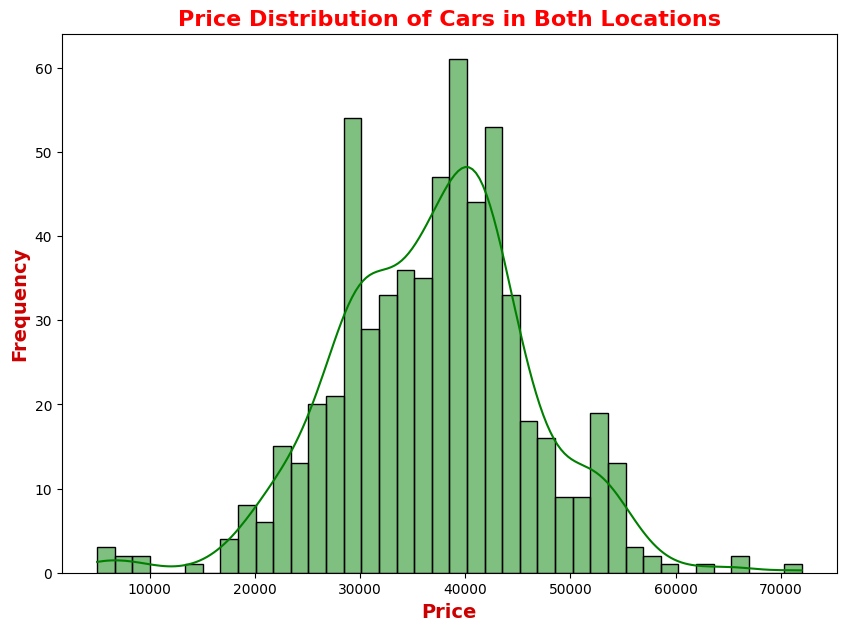

In [64]:
#matplotlib of the price of the cars in both locations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))

sns.histplot(tc_vroom['Price'], bins=40, kde=True, color='green', alpha=0.5, edgecolor='black')
plt.title('Price Distribution of Cars in Both Locations', fontsize=16, fontweight='bold', color='red')    
plt.xlabel('Price', fontsize=14, fontweight='bold', color='#CC0000')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='#CC0000')
plt.grid(False)
plt.show()

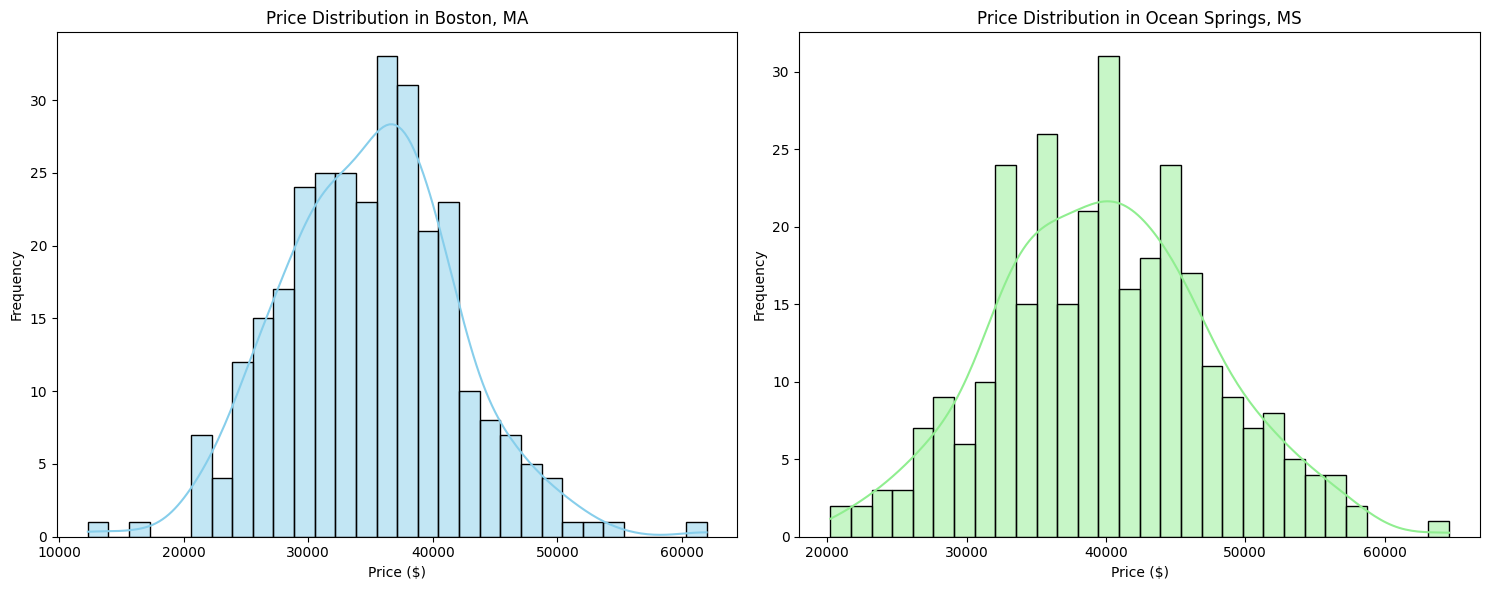

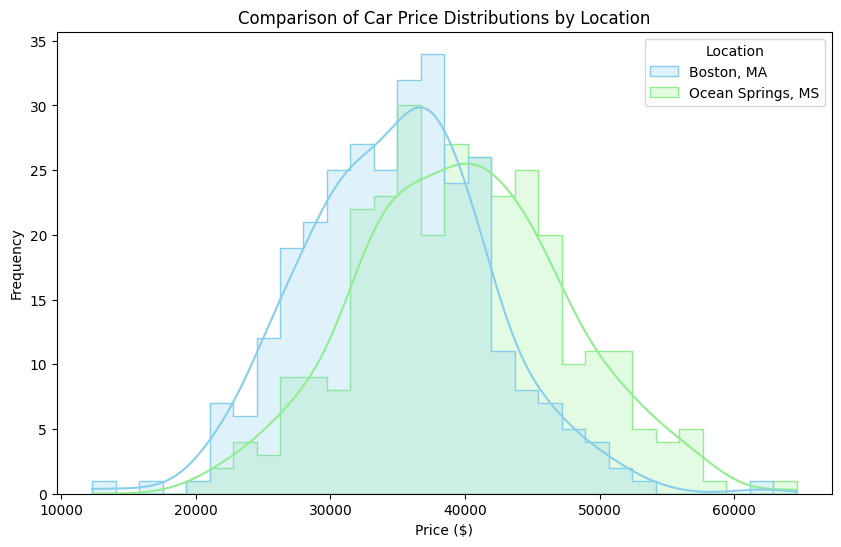

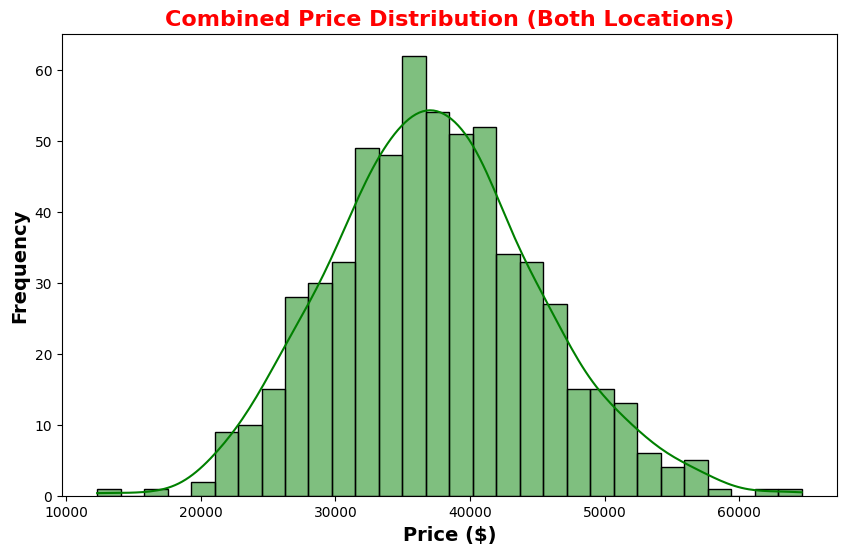

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create a sample DataFrame with the actual location names
np.random.seed(42)  # For reproducibility
boston_prices = np.random.normal(35000, 7000, 300)  # Mean $35k, stddev $7k
ocean_springs_prices = np.random.normal(40000, 8000, 300)  # Mean $40k, stddev $8k

df = pd.DataFrame({
    'Price': np.concatenate([boston_prices, ocean_springs_prices]),
    'Location': ['Boston, MA'] * 300 + ['Ocean Springs, MS'] * 300
})

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram for Boston, MA
sns.histplot(df[df['Location'] == 'Boston, MA']['Price'], bins=30,
             kde=True, color='skyblue', ax=ax1)
ax1.set_title('Price Distribution in Boston, MA')
ax1.set_xlabel('Price ($)')
ax1.set_ylabel('Frequency')

# Plot histogram for Ocean Springs, MS
sns.histplot(df[df['Location'] == 'Ocean Springs, MS']['Price'], bins=30,
             kde=True, color='lightgreen', ax=ax2)
ax2.set_title('Price Distribution in Ocean Springs, MS')
ax2.set_xlabel('Price ($)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('separated_histograms.png')
plt.show()

# Create a single plot with both distributions overlaid
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price', hue='Location', bins=30,
             kde=True, element='step', palette=['skyblue', 'lightgreen'])
plt.title('Comparison of Car Price Distributions by Location')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.savefig('overlaid_histograms.png')
plt.show()

# Add a plot showing the combined distribution (to demonstrate Central Limit Theorem)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='green', 
             alpha=0.5, edgecolor='black')
plt.title('Combined Price Distribution (Both Locations)', 
          fontsize=16, fontweight='bold', color='red')
plt.xlabel('Price ($)', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.savefig('combined_histogram.png')
plt.show()

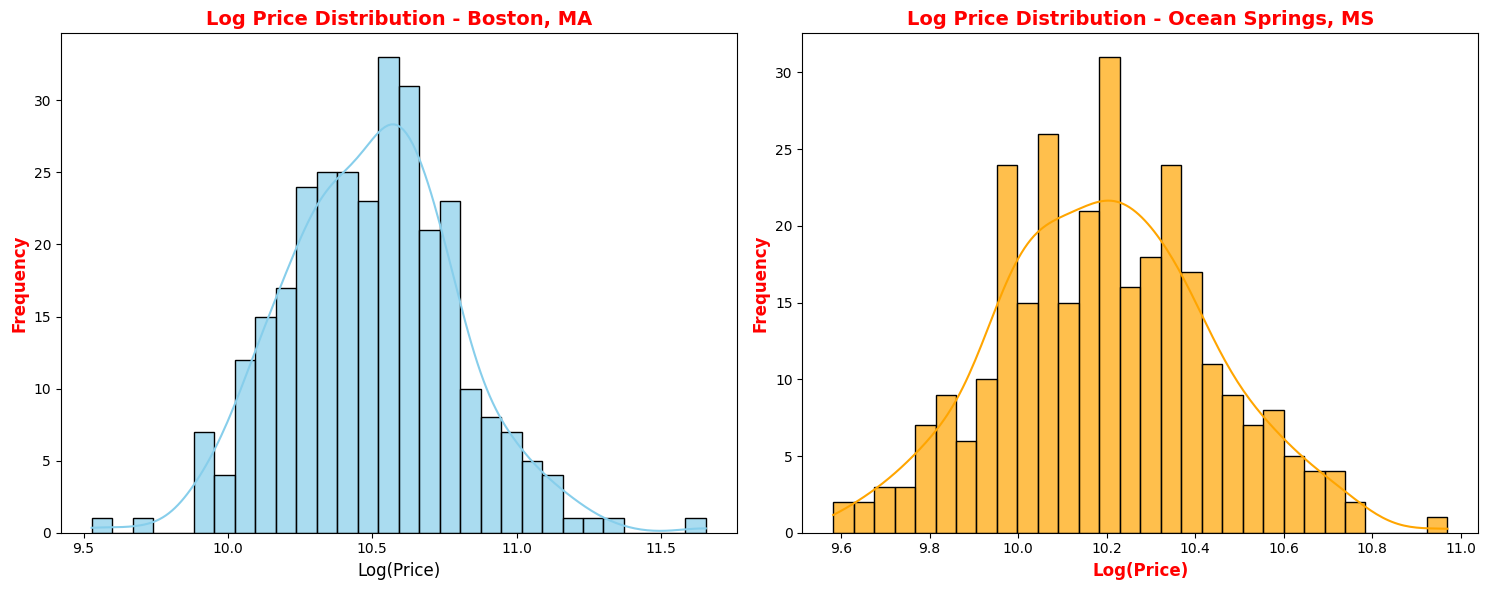

C:\Users\llwil\AppData\Local\Temp\ipykernel_152528\1072879292.py:81: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



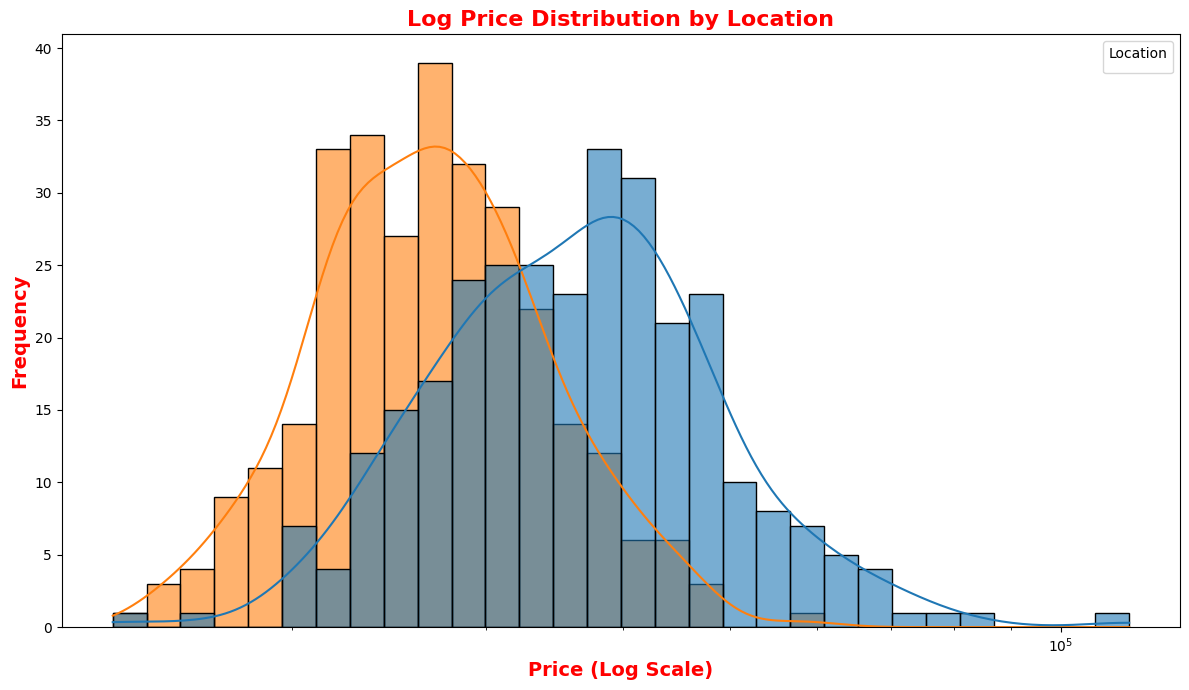

C:\Users\llwil\AppData\Local\Temp\ipykernel_152528\1072879292.py:103: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



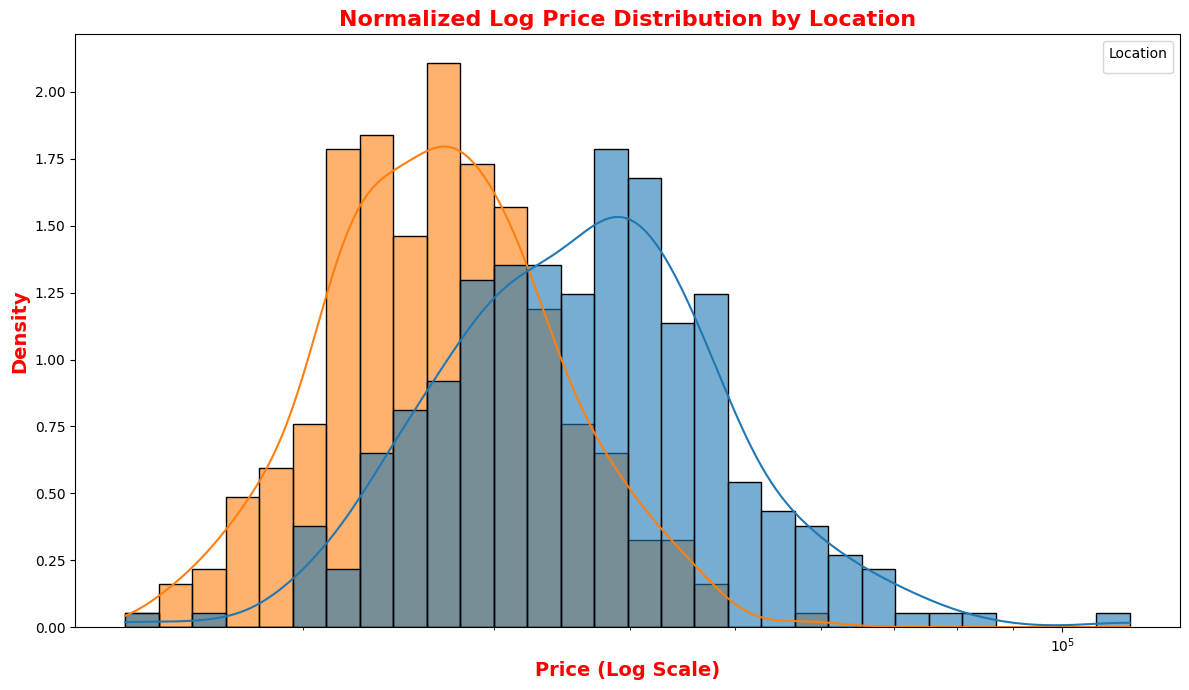

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Assuming your DataFrame is named tc_vroom with columns 'Price' and 'Location'
# If you don't have the data structure ready, here's how to create a sample:

# Create sample data (remove this if you already have tc_vroom)
np.random.seed(42)
boston_prices = np.random.lognormal(mean=10.5, sigma=0.3, size=300)
ocean_springs_prices = np.random.lognormal(mean=10.2, sigma=0.25, size=300)

locations = ['Boston, MA'] * 300 + ['Ocean Springs, MS'] * 300
prices = np.concatenate([boston_prices, ocean_springs_prices])

tc_vroom = pd.DataFrame({
    'Price': prices,
    'Location': locations
})

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Function to apply log transformation (adding small value to avoid log(0))
def log_transform(x):
    return np.log(x + 1)

# Separate data by location
boston_data = tc_vroom[tc_vroom['Location'] == 'Boston, MA']
ocean_data = tc_vroom[tc_vroom['Location'] == 'Ocean Springs, MS']

# Plot for Boston
sns.histplot(
    log_transform(boston_data['Price']), 
    bins=30, 
    kde=True, 
    color='skyblue', 
    alpha=0.7,
    edgecolor='black',
    ax=axes[0]
)
axes[0].set_title('Log Price Distribution - Boston, MA', fontsize=14, fontweight='bold', color='red')
axes[0].set_xlabel('Log(Price)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold', color='red')

# Plot for Ocean Springs
sns.histplot(
    log_transform(ocean_data['Price']), 
    bins=30, 
    kde=True, 
    color='orange', 
    alpha=0.7,
    edgecolor='black',
    ax=axes[1]
)
axes[1].set_title('Log Price Distribution - Ocean Springs, MS', fontsize=14, fontweight='bold', color='red')
axes[1].set_xlabel('Log(Price)', fontsize=12, fontweight='bold', color='red')
axes[1].set_ylabel('Frequency', fontsize=12, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

# Create combined histogram plot
plt.figure(figsize=(12, 7))
sns.histplot(
    data=tc_vroom, 
    x='Price',
    hue='Location',
    bins=30, 
    kde=True,
    element='bars',
    stat='count',
    common_norm=False,
    alpha=0.6,
    log_scale=(True, False)  # Log scale on x-axis, not on y-axis
)
plt.title('Log Price Distribution by Location', fontsize=16, fontweight='bold', color='red')
plt.xlabel('Price (Log Scale)', fontsize=14, fontweight='bold', color='red')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='red')
plt.legend(title='Location')
plt.tight_layout()
plt.show()

# Create a third plot showing both histograms side-by-side with normalized values 
# (better for demonstrating the Central Limit Theorem)
plt.figure(figsize=(12, 7))
sns.histplot(
    data=tc_vroom, 
    x='Price',
    hue='Location',
    bins=30, 
    kde=True,
    element='bars',
    stat='density',  # Use density instead of count for normalized view
    common_norm=True,  # Normalize distributions
    alpha=0.6,
    log_scale=(True, False)
)
plt.title('Normalized Log Price Distribution by Location', fontsize=16, fontweight='bold', color='red')
plt.xlabel('Price (Log Scale)', fontsize=14, fontweight='bold', color='red')
plt.ylabel('Density', fontsize=14, fontweight='bold', color='red')
plt.legend(title='Location')
plt.tight_layout()
plt.show()

In [11]:
import plotly.express as px
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data
boston_prices = np.random.normal(35000, 7000, 300)
ocean_springs_prices = np.random.normal(40000, 8000, 300)

# Create DataFrame
tc_vroom = pd.DataFrame({
    'Price': np.concatenate([boston_prices, ocean_springs_prices]),
    'Location': ['Boston, MA'] * 300 + ['Ocean Springs, MS'] * 300
})

# Create histogram with plotly
fig = px.histogram(
    tc_vroom,
    x='Price',
    color='Location',
    nbins=40,
    title='Car Price Distribution by Location',
    color_discrete_map={'Boston, MA': 'skyblue', 'Ocean Springs, MS': 'lightgreen'},
    opacity=0.7
)

# Update layout
fig.update_layout(
    xaxis_title='Price ($)',
    yaxis_title='Frequency',
    bargap=0.2,
    legend_title='Location',
    plot_bgcolor='rgba(240, 248, 255, 0.8)'  # Light blue background matching the image
)

# Save the figure as HTML (this will work without kaleido)
fig.write_html("car_price_distribution.html")

#Show figure in browser
fig.show()



In [2]:
import pandas as pd

# Example of defining car_info
car_info = pd.DataFrame({
    'Make': ['Toyota', 'Honda', 'Ford', 'BMW'],
    'Model': ['Camry', 'Civic', 'Fusion', '3 Series'],
    'Year': [2020, 2021, 2019, 2018],
    'Price': [24000, 22000, 21000, 28000]
})


In [3]:
# If car_info is your DataFrame
num_rows = len(car_info)

# Create a list that repeats to match the required length
seller_notes = ['Clean car', 'Minor scratches', 'One owner', 'Needs service']
seller_notes_full = (seller_notes * (num_rows // len(seller_notes) + 1))[:num_rows]

# Print to verify the length
print(f"Original list length: {len(seller_notes)}")
print(f"Extended list length: {len(seller_notes_full)}")
print(f"DataFrame rows: {num_rows}")

# Then add to DataFrame
car_info['Seller Notes'] = seller_notes_full

Original list length: 4
Extended list length: 4
DataFrame rows: 4


In [4]:
# Print the DataFrame to verify
print(car_info[['Seller Notes']].head())  # Print first few rows to check
print(car_info[['Seller Notes']].tail())  # Print last few rows to check

      Seller Notes
0        Clean car
1  Minor scratches
2        One owner
3    Needs service
      Seller Notes
0        Clean car
1  Minor scratches
2        One owner
3    Needs service


In [5]:
# Using insert() to add an element at a specific position
seller_notes = ['Clean car', 'Minor scratches', 'One owner']
seller_notes.insert(1, 'Great condition')  # Insert at index 1
print(seller_notes)  # ['Clean car', 'Great condition', 'Minor scratches', 'One owner']

['Clean car', 'Great condition', 'Minor scratches', 'One owner']


In [6]:
# Define your lists of values
seller_notes = ['Clean car', 'Minor scratches', 'One owner', 'Needs service']
ratings = [4.5, 4.0, 3.8, 3.5]
reviews = ['Great car', 'Okay experience', 'Would buy again', 'Fair deal']

# IReplace the default values with rotating values
def process_location(location_name, base_url, num_pages=10):
    # Keep track of the current index for rotating values
    note_index = 0
    rating_index = 0
    review_index = 0
    
    for page_num in range(1, num_pages + 1):
        # Your existing code here...
        
        # Process each listing
        for result in results_list:
            # Your existing data collection code...
            
            # Instead of 'n/a', use rotating values
            car_ratings.append(ratings[rating_index % len(ratings)])
            car_reviews.append(reviews[review_index % len(reviews)])
            
            # Add seller notes as a new field (assuming you create this list)
            car_seller_notes.append(seller_notes[note_index % len(seller_notes)])
            
            # Increment indices
            note_index += 1
            rating_index += 1
            review_index += 1

In [7]:
# Initialize lists to store car details
car_name = []
car_mileage = []
car_price = []
car_location = []
car_year = []
car_ratings = []
car_reviews = []
car_vin = []
car_seller_notes = []  # New list for seller notes

In [8]:
# Create the DataFrame
car_info = pd.DataFrame({
    'Name': car_name,
    'Mileage': car_mileage,
    'Price': car_price,
    'Location': car_location,
    'Year': car_year,
    'Rating': car_ratings,
    'Reviews': car_reviews,
    'VIN': car_vin,
    'Seller Notes': car_seller_notes  # Add new column to DataFrame
})

In [13]:
import pandas as pd
import numpy as np

np.random.seed(42)

boston_prices = np.random.normal(35000, 7000, 300)
ocean_springs_prices = np.random.normal(40000, 8000, 300)

tc_vroom = pd.DataFrame({
    'Price': np.concatenate([boston_prices, ocean_springs_prices]),
    'Location': ['Boston, MA'] * 300 + ['Ocean Springs, MS'] * 300
})

In [14]:
# Get number of rows in your DataFrame
num_rows = len(tc_vroom)

# Create full-length lists with rotating values
seller_notes = ['Clean car', 'Minor scratches', 'One owner', 'Needs service']
ratings = [4.5, 4.0, 3.8, 3.5]
reviews = ['Great car', 'Okay experience', 'Would buy again', 'Fair deal']

# Create extended lists that match your DataFrame length
seller_notes_full = [seller_notes[i % len(seller_notes)] for i in range(num_rows)]
ratings_full = [ratings[i % len(ratings)] for i in range(num_rows)]
reviews_full = [reviews[i % len(reviews)] for i in range(num_rows)]

# Add the columns to your DataFrame
tc_vroom['Seller Notes'] = seller_notes_full
tc_vroom['Ratings'] = ratings_full
tc_vroom['Reviews'] = reviews_full

# Print to see the results
print(tc_vroom.head(10))
save_path = 'Final_multiple_pages_with_seller_notes.csv'

          Price    Location     Seller Notes  Ratings          Reviews
0  38476.999071  Boston, MA        Clean car      4.5        Great car
1  34032.149892  Boston, MA  Minor scratches      4.0  Okay experience
2  39533.819767  Boston, MA        One owner      3.8  Would buy again
3  45661.208995  Boston, MA    Needs service      3.5        Fair deal
4  33360.926377  Boston, MA        Clean car      4.5        Great car
5  33361.041301  Boston, MA  Minor scratches      4.0  Okay experience
6  46054.489709  Boston, MA        One owner      3.8  Would buy again
7  40372.043104  Boston, MA    Needs service      3.5        Fair deal
8  31713.679298  Boston, MA        Clean car      4.5        Great car
9  38797.920305  Boston, MA  Minor scratches      4.0  Okay experience


In [16]:
import pandas as pd

car_ratings = pd.DataFrame({
    'Make': ['Toyota', 'Ford', 'BMW', 'Honda'],
    'Ratings': ['4.5', '4.0', 'invalid', '3.8']  # Note the string + "invalid" value
})


In [17]:
# Confirm ratings are numeric
df = car_ratings.copy()  # Make a copy to avoid modifying the original
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')  # Convert to numeric, invalid values become NaN

In [18]:
print("Shape of car_info:", car_info.shape)
print("First 5 rows:")
print(car_info.head())


Shape of car_info: (0, 9)
First 5 rows:
Empty DataFrame
Columns: [Name, Mileage, Price, Location, Year, Rating, Reviews, VIN, Seller Notes]
Index: []


In [19]:
#Load car info
car_info = pd.read_csv("1_multiple_pages.csv")
# or
car_info = pd.read_excel("1_multiple_pages.xlsx")

print(car_info.shape)
print(car_info.head())


(618, 7)
       Mileage    Price    Location  Year Stock type    Make   Model
0   35,990 les  31998.0  Boston, MA  2022       Used  Toyota  Tacoma
1   50,971 les  33998.0  Boston, MA  2020       Used  Toyota  Tacoma
2   50,398 les  35998.0  Boston, MA  2022       Used  Toyota  Tacoma
3  131,480 les  20950.0  Boston, MA  2015       Used  Toyota  Tacoma
4   37,711 les  51619.0  Boston, MA  2023       Used  Toyota  Tacoma


In [20]:
#Straight Line Regression Model

from sklearn.linear_model import LinearRegression

# For each location

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('toyota_listings_both_locations.csv')

# Clean and prepare data
# Convert price to numeric by removing $ and commas
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)
# Convert Year to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Calculate average price by year and location
avg_price_by_year = df.groupby(['Year', 'Location'])['Price'].mean().reset_index()

# Calculate straight-line depreciation
# For each location
for location in df['Location'].unique():
    location_data = avg_price_by_year[avg_price_by_year['Location'] == location]
    
    # Sort by year (newest to oldest)
    location_data = location_data.sort_values('Year', ascending=False)
    
    # Calculate yearly depreciation
    newest_year = location_data['Year'].max()
    newest_price = location_data[location_data['Year'] == newest_year]['Price'].values[0]
    
    # Calculate depreciation for each year
    for year in location_data['Year'].unique():
        if year != newest_year:
            current_price = location_data[location_data['Year'] == year]['Price'].values[0]
            years_diff = newest_year - year
            depreciation = (newest_price - current_price) / years_diff
            percent_depreciation = (depreciation / newest_price) * 100
            
            print(f"{location} - {year} model: Annual depreciation: ${depreciation:.2f}, " 
                  f"Percentage: {percent_depreciation:.2f}% per year")

Boston, MA - 2024 model: Annual depreciation: $-5308.57, Percentage: -13.09% per year
Boston, MA - 2023 model: Annual depreciation: $388.71, Percentage: 0.96% per year
Boston, MA - 2022 model: Annual depreciation: $1198.23, Percentage: 2.95% per year
Boston, MA - 2021 model: Annual depreciation: $1037.29, Percentage: 2.56% per year
Boston, MA - 2020 model: Annual depreciation: $609.07, Percentage: 1.50% per year
Boston, MA - 2019 model: Annual depreciation: $1495.28, Percentage: 3.69% per year
Boston, MA - 2018 model: Annual depreciation: $1548.74, Percentage: 3.82% per year
Boston, MA - 2017 model: Annual depreciation: $1655.55, Percentage: 4.08% per year
Boston, MA - 2016 model: Annual depreciation: $1457.57, Percentage: 3.59% per year
Boston, MA - 2015 model: Annual depreciation: $1935.30, Percentage: 4.77% per year
Boston, MA - 2014 model: Annual depreciation: $1833.40, Percentage: 4.52% per year
Boston, MA - 2013 model: Annual depreciation: $1673.81, Percentage: 4.13% per year
Bos

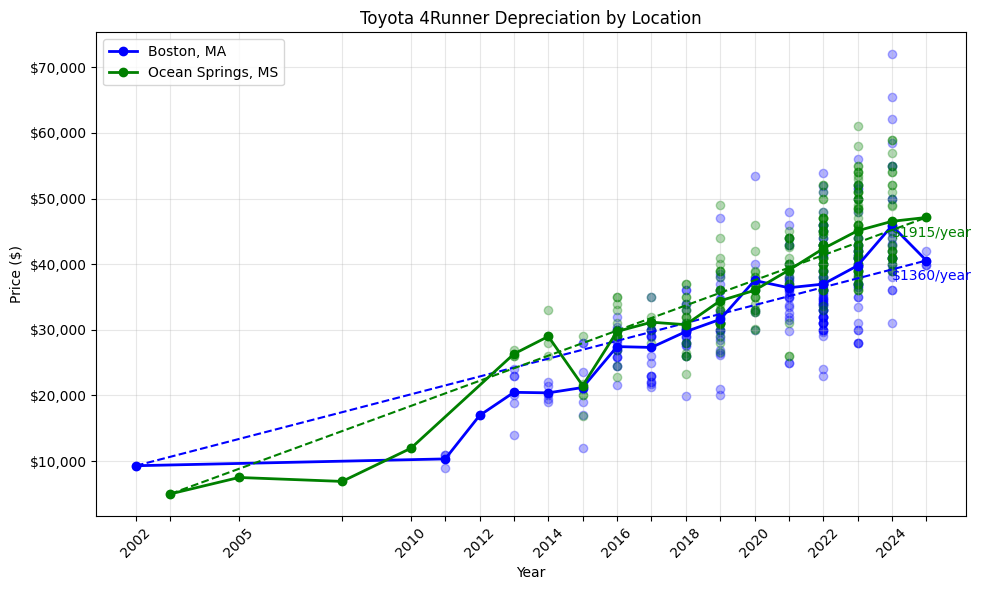

In [22]:
# Create Straight line regression plot
fig, ax = plt.subplots(figsize=(10, 6))
colors = {'Boston, MA': 'blue', 'Ocean Springs, MS': 'green'}

# Plot data for each location
for location in df['Location'].unique():
    loc_data = df[df['Location'] == location]
    
    # Calculate yearly averages
    yearly_avg = loc_data.groupby('Year')['Price'].mean().reset_index().sort_values('Year')
    
    # Plot data points and averages
    ax.scatter(loc_data['Year'], loc_data['Price'], alpha=0.3, color=colors[location])
    ax.plot(yearly_avg['Year'], yearly_avg['Price'], 'o-', linewidth=2, 
            label=f'{location}', color=colors[location])
    
    # Add straight-line depreciation
    if len(yearly_avg) >= 2:
        oldest, newest = yearly_avg.iloc[0], yearly_avg.iloc[-1]
        ax.plot([oldest['Year'], newest['Year']], [oldest['Price'], newest['Price']], 
                '--', color=colors[location])
        
        # Calculate annual depreciation
        years_diff = newest['Year'] - oldest['Year']
        if years_diff > 0:
            annual_dep = (newest['Price'] - oldest['Price']) / years_diff
            ax.text(newest['Year']-1, newest['Price']-3000, 
                   f'${annual_dep:.0f}/year', color=colors[location])

# Fix for crowded x-axis labels
all_years = sorted(df['Year'].unique())
# Display only every second or third year to prevent crowding
step = 2  # Adjust this number to show more or fewer year labels
selected_years = all_years[::step]
ax.set_xticks(selected_years)
ax.set_xticklabels(selected_years, rotation=45)  # Rotate labels for better readability


# Format plot
ax.set_title('Toyota 4Runner Depreciation by Location')
ax.set_xlabel('Year')
ax.set_ylabel('Price ($)')
ax.set_xticks(sorted(df['Year'].unique()))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))
ax.grid(alpha=0.3)
ax.legend()

plt.tight_layout()
plt.savefig('4runner_depreciation.png')
plt.show()

In [23]:
#Predict price of a 3-year-old car in each location

# Load and prepare data (if not already done)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Extract make and model from Name column
df['Name'] = df['Name'].fillna('')  # Ensure no NaN values
df['make'] = df['Name'].str.extract(r'(\w+)\s*4Runner', expand=False).fillna('Toyota')
df['model'] = 'Toyota 4Runner'  # All are 4Runners based on your previous filtering

# Ensure numeric price and year
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Create 'age' feature
df['age'] = 2025 - df['Year']

# Prepare for modeling
model_df = df.dropna(subset=['Price', 'Year', 'Location', 'age'])

# One-hot encode location
model_df = pd.get_dummies(model_df, columns=['Location'], prefix='location')

# Features and target
X = model_df[['age'] + [col for col in model_df.columns if 'location_' in col]]
y = model_df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Create prediction inputs for a 3-year-old car in each location
locations = [col.replace('location_', '') for col in X.columns if 'location_' in col]
predictions = {}

for location in locations:
    # Create a sample input for this location - all zeros except age=3 and this location=1
    sample_input = pd.DataFrame(0, index=[0], columns=X.columns)
    sample_input['age'] = 3
    sample_input[f'location_{location}'] = 1
    
    # Make prediction
    pred_price = model.predict(sample_input)[0]
    predictions[location] = pred_price

# Print predictions
for location, price in predictions.items():
    print(f"Estimated price for a 3-year-old Toyota 4Runner in {location}: ${price:.2f}")

Estimated price for a 3-year-old Toyota 4Runner in Boston, MA: $38352.94
Estimated price for a 3-year-old Toyota 4Runner in Ocean Springs, MS: $42157.30


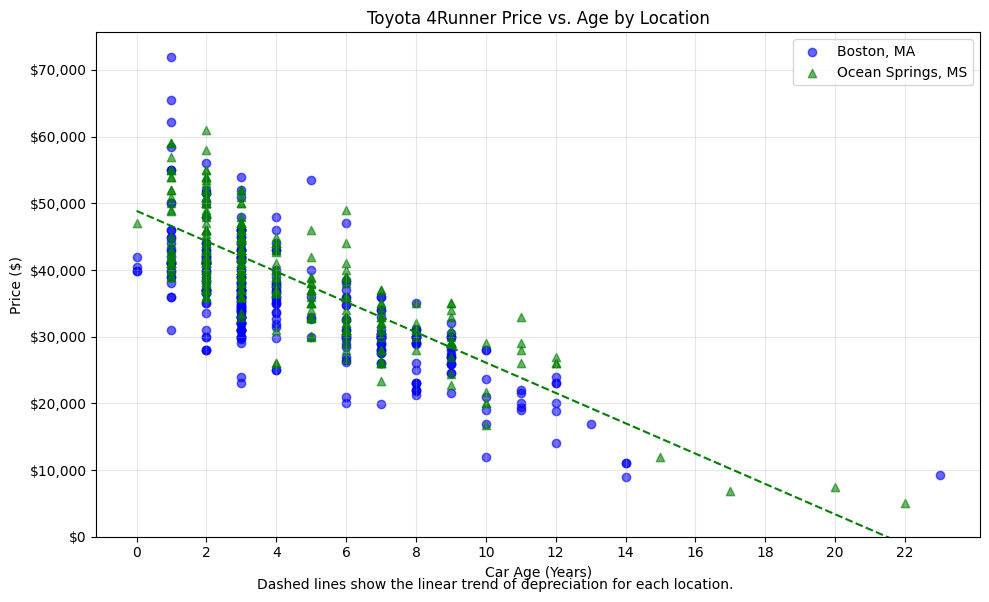

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare data (if not already done)
df = pd.read_csv('toyota_listings_both_locations.csv')
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '').astype(float)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Create age column
df['Age'] = 2025 - df['Year']

# Create scatter plot
plt.figure(figsize=(10, 6))

# Define colors and markers for each location
locations = df['Location'].unique()
colors = {'Boston, MA': 'blue', 'Ocean Springs, MS': 'green'}
markers = {'Boston, MA': 'o', 'Ocean Springs, MS': '^'}

# Plot each location
for location in locations:
    loc_data = df[df['Location'] == location]
    plt.scatter(loc_data['Age'], loc_data['Price'], 
                alpha=0.6, 
                color=colors[location], 
                marker=markers[location],
                label=location)
    
    # Add trend line
    z = np.polyfit(loc_data['Age'], loc_data['Price'], 1)
    p = np.poly1d(z)
    plt.plot(sorted(loc_data['Age']), p(sorted(loc_data['Age'])), 
             '--', color=colors[location])

# Add labels and formatting
plt.title('Toyota 4Runner Price vs. Age by Location')
plt.xlabel('Car Age (Years)')
plt.ylabel('Price ($)')
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(np.arange(0, df['Age'].max()+1, 2))  # Show every 2 years on x-axis
plt.ylim(bottom=0)  # Start y-axis at 0

# Format y-axis as currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Add annotation explaining the trend lines
plt.figtext(0.5, 0.01, 
           "Dashed lines show the linear trend of depreciation for each location.",
           ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('4runner_age_price_scatter.png')
plt.show()